In [4]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

# Para clustering
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Para componentes principales
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

##1)

###a)

In [5]:
x = {"longitud" : [93,94,96,101,102,103,104,106], "ancho" : [76,78,80,84,85,82,83,83]}
X = pd.DataFrame(x)
X

,longitud,ancho
0,93,76
1,94,78
2,96,80
3,101,84
4,102,85
5,103,82
6,104,83
7,106,83


In [6]:
X[["longitud", "ancho"]] = MinMaxScaler().fit_transform(X[["longitud", "ancho"]])
X

,longitud,ancho
0,0.000000,0.000000
1,0.076923,0.222222
2,0.230769,0.444444
3,0.615385,0.888889
4,0.692308,1.000000
5,0.769231,0.666667
6,0.846154,0.777778
7,1.000000,0.777778


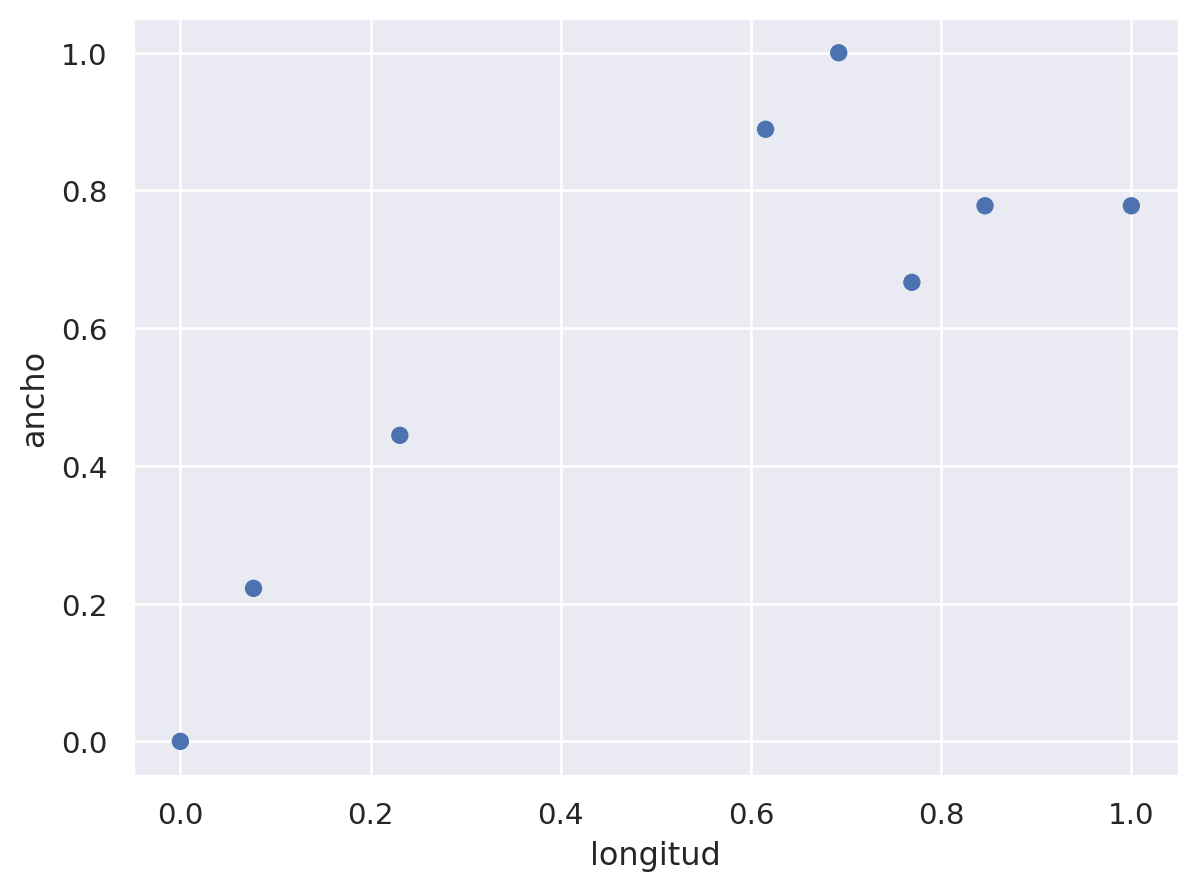

In [7]:
(
    so.Plot(X, x = "longitud", y = "ancho")
    .add(so.Dot())
)

Tiene pinta de que la correlación entre ambas es positiva (mayor a 0)

###b)

In [8]:
X_mean = X.mean()
X_star = X - X_mean
X_star

,longitud,ancho
0,-0.528846,-0.597222
1,-0.451923,-0.375000
2,-0.298077,-0.152778
3,0.086538,0.291667
4,0.163462,0.402778
5,0.240385,0.069444
6,0.317308,0.180556
7,0.471154,0.180556


In [9]:
n = len(X_star)
Sigma = (X_star.transpose() @ X_star) / n
Sigma

,longitud,ancho
longitud,0.123428,0.097623
ancho,0.097623,0.104745


In [10]:
gamma, U = np.linalg.eigh(Sigma)
print(gamma)
print(U)
U = np.flip(U, 1)
print(U)

[0.01601803 0.21215559]
[[ 0.6725868  -0.74001824]
 [-0.74001824 -0.6725868 ]]
[[-0.74001824  0.6725868 ]
 [-0.6725868  -0.74001824]]


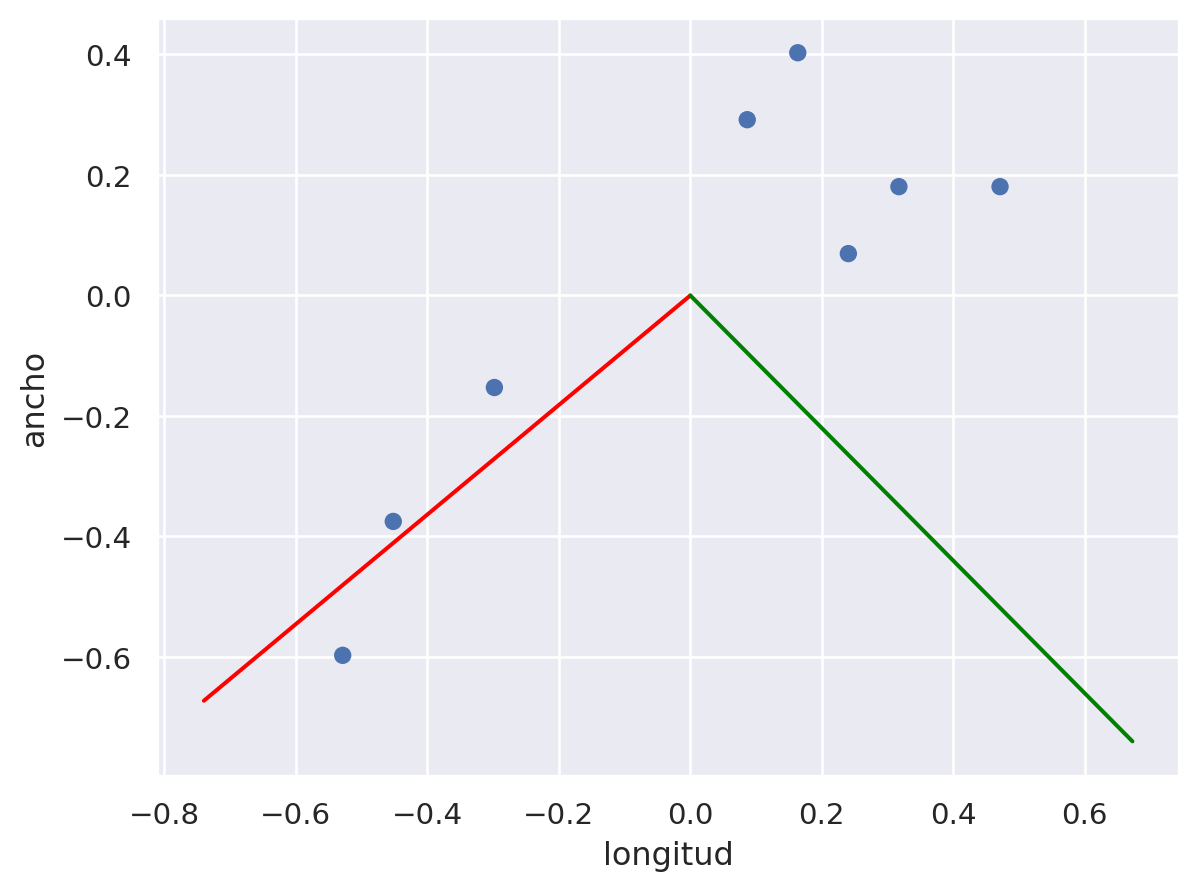

In [11]:
(
    so.Plot()
    .add(so.Dot(), x = X_star["longitud"], y = X_star["ancho"])
    .add(so.Line(color = "red"), x = [0, U[0,0]], y = [0, U[1,0]])
    .add(so.Line(color = "green"), x = [0, U[0,1]], y = [0, U[1,1]])
)

###c)

In [12]:
Z = X_star @ U
Z.columns = ["Z1","Z2"]
Z

,Z1,Z2
0,0.793040,0.086260
1,0.586651,-0.026451
2,0.323339,-0.087424
3,-0.260211,-0.157634
4,-0.391868,-0.188121
5,-0.224596,0.110289
6,-0.356253,0.079803
7,-0.470102,0.183277


###d) ¿¿¿¿¿¿¿¿¿¿¿

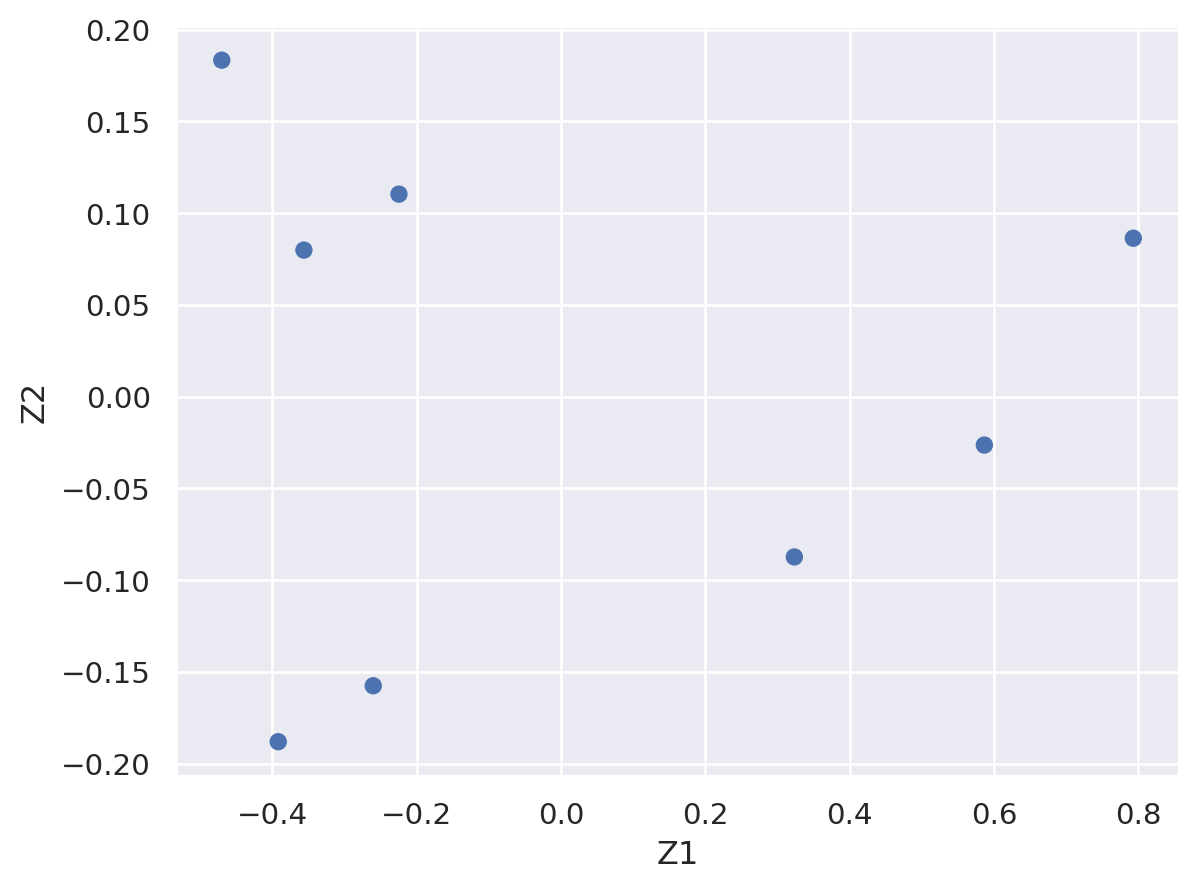

In [13]:
(
    so.Plot(Z, x = "Z1", y = "Z2")
    .add(so.Dot())
)

###e)

In [14]:
print("Variaza explicada por la primera componente: ", gamma[0] / sum(gamma))
print("Variaza explicada por la segunda componente: ", gamma[1] / sum(gamma))

Variaza explicada por la primera componente:  0.07020106112588333
Variaza explicada por la segunda componente:  0.9297989388741167


In [15]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X_star)
print(principalComponents)

[[ 0.79303958 -0.08626039]
 [ 0.58665137  0.02645066]
 [ 0.32333868  0.08742426]
 [-0.26021119  0.15763403]
 [-0.39186754  0.18812083]
 [-0.22459642 -0.11028936]
 [-0.35625276 -0.07980256]
 [-0.47010172 -0.18327746]]


In [16]:
print(pca.components_)
print(U)

[[-0.74001824 -0.6725868 ]
 [-0.6725868   0.74001824]]
[[-0.74001824  0.6725868 ]
 [-0.6725868  -0.74001824]]


##2)

###a)

In [17]:
matriz = {"0" : [3,1,1], "1" : [1,3,1], "2" : [1,1,5]}
A = pd.DataFrame(matriz)
A

,0,1,2
0,3,1,1
1,1,3,1
2,1,1,5


In [18]:
gamma, U = np.linalg.eigh(A)
print(gamma)
U = np.flip(U, 1)
print(U)

[2. 3. 6.]
[[ 0.40824829  0.57735027  0.70710678]
 [ 0.40824829  0.57735027 -0.70710678]
 [ 0.81649658 -0.57735027  0.        ]]


##4)

###a)

In [20]:
X4 = pd.read_csv("/content/p8-chalets.csv")
X4

,Promotora,DuracionHipoteca,PrecioMedio,SuperficieCocina
0,1,8.7,0.3,3.1
1,2,14.3,0.9,7.4
2,3,18.9,1.8,9.0
3,4,19.0,0.8,9.4
4,5,20.5,0.9,8.3
5,6,14.7,1.1,7.6
6,7,18.8,2.5,12.6
7,8,37.3,2.7,18.1
8,9,12.6,1.3,5.9
9,10,25.7,3.4,15.9


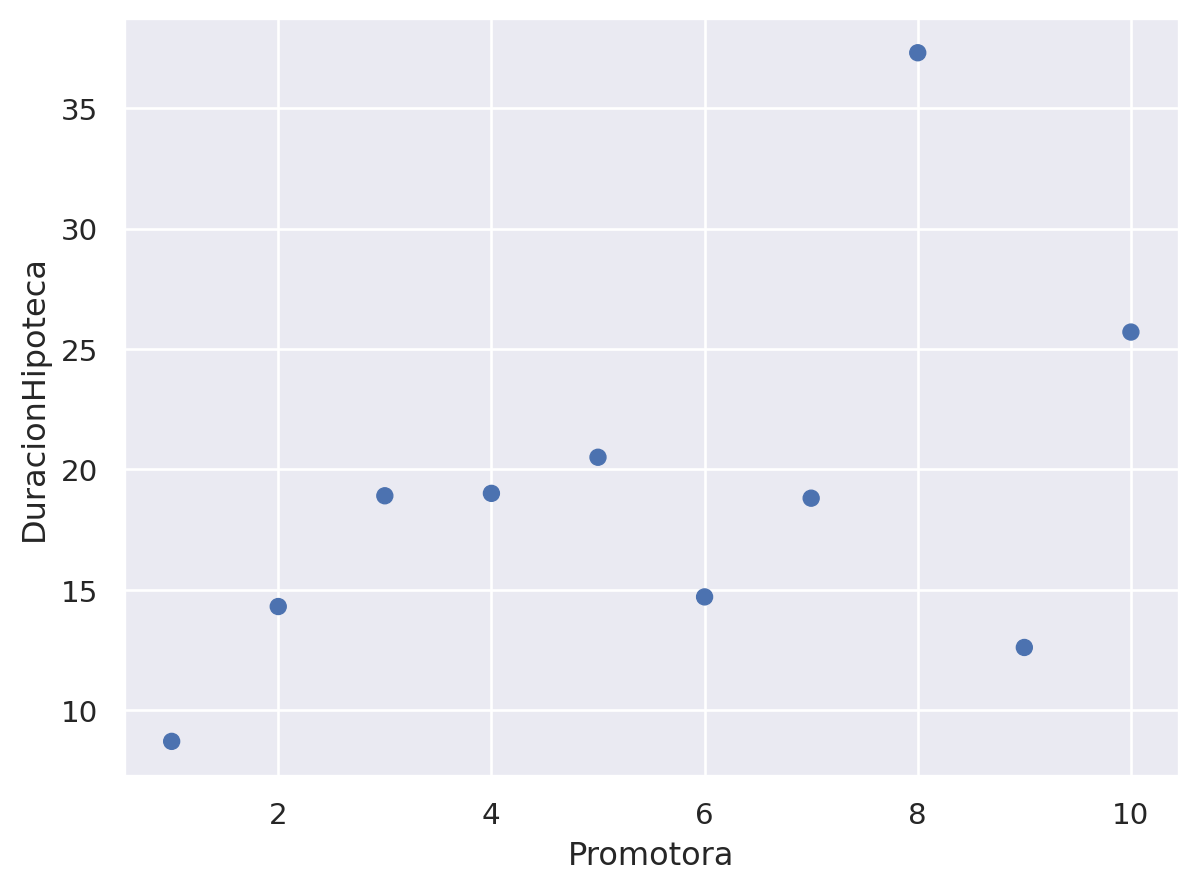

In [21]:
(
    so.Plot(X4, x = "Promotora", y = "DuracionHipoteca")
    .add(so.Dot())
)

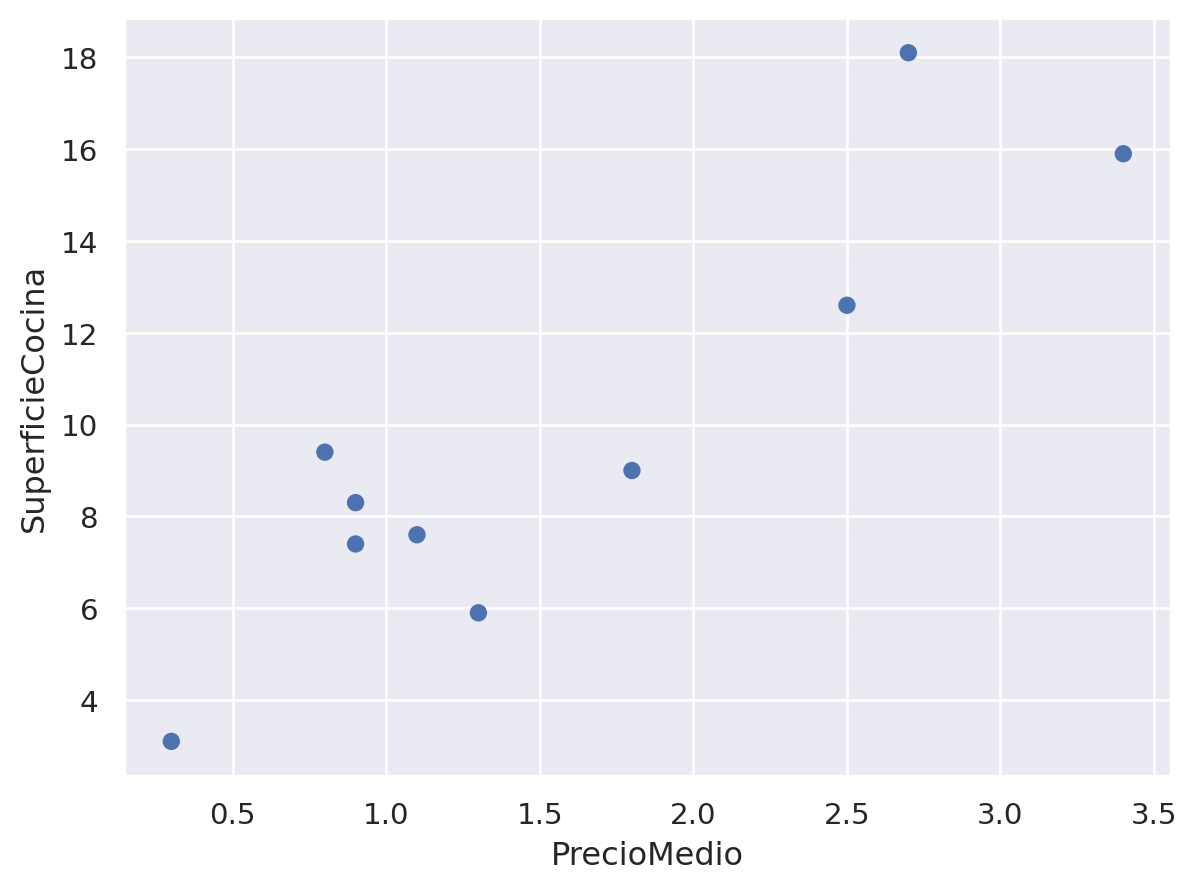

In [22]:
(
    so.Plot(X4, x = "PrecioMedio", y = "SuperficieCocina")
    .add(so.Dot())
)

In [23]:
X_1 = X4[["Promotora","DuracionHipoteca"]]
X_2 = X4[["PrecioMedio","SuperficieCocina"]]
X_1_mean = X_1.mean()
X_2_mean = X_2.mean()
X_1_star = X_1 - X_1_mean
X_2_star = X_2 - X_2_mean
X_1_star

,Promotora,DuracionHipoteca
0,-4.5,-10.35
1,-3.5,-4.75
2,-2.5,-0.15
3,-1.5,-0.05
4,-0.5,1.45
5,0.5,-4.35
6,1.5,-0.25
7,2.5,18.25
8,3.5,-6.45
9,4.5,6.65


###b)

In [24]:
n = len(X_1_star)
Sigma = (X_1_star.transpose() @ X_1_star) / n
Sigma

,Promotora,DuracionHipoteca
Promotora,8.250,11.3350
DuracionHipoteca,11.335,56.9685


In [25]:
gamma, U = np.linalg.eigh(Sigma)
print(gamma)
U = np.flip(U, 1)
print(U)

[ 5.74188531 59.47661469]
[[ 0.21604597 -0.97638319]
 [ 0.97638319  0.21604597]]


In [26]:
print("Variaza explicada por la primera componente: ", gamma[0] / sum(gamma))
print("Variaza explicada por la segunda componente: ", gamma[1] / sum(gamma))

Variaza explicada por la primera componente:  0.08804074467682138
Variaza explicada por la segunda componente:  0.9119592553231787


##6)

###a)

In [27]:
X6 = pd.read_csv("/content/p8-hospitales-escalado.csv")
X6

,Servicio,NI,MO,RE,NE,ICM,ES
0,Cirugia,0.358385,0.304,0.244275,0.257901,0.564103,0.443958
1,Tocoginecologia,1.000000,0.024,0.221374,0.065260,0.008547,0.447995
2,Hematologia,0.000000,0.328,0.503817,0.356053,1.000000,0.082968
3,Cardiologia,0.040369,0.176,0.282443,0.000000,0.675214,0.160020
4,Digestivo,0.044879,0.472,0.229008,0.294376,0.470085,0.130156
5,Medicina.Interna,0.790638,1.000,0.404580,0.781110,0.452991,1.000000
6,Neumologia,0.015675,0.408,0.320611,0.020049,0.820513,0.085489
7,Otorrinolaringologia,0.034572,0.168,0.160305,0.799670,0.307692,0.044112
8,Oftalmologia,0.107580,0.000,0.000000,0.788719,0.264957,0.000000
9,Pediatria,0.700666,0.024,0.145038,0.246065,0.000000,0.236174


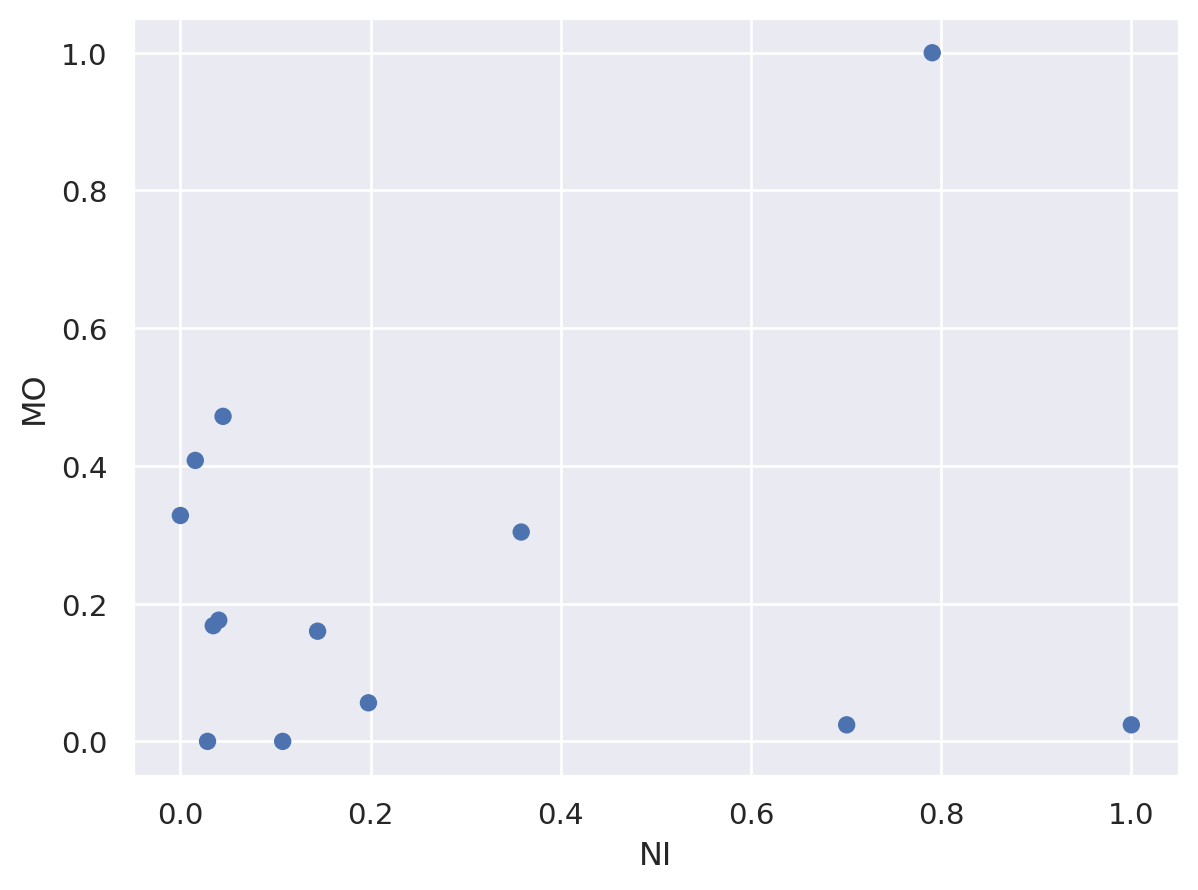

In [28]:
(
    so.Plot(X6, x = "NI", y = "MO")
    .add(so.Dot())
)

In [29]:
X_6 = X6[["NI","MO"]]
X6_star = X_6 - X_6.mean()
X6_star

,NI,MO
0,0.091971,0.064
1,0.733586,-0.216
2,-0.266414,0.088
3,-0.226045,-0.064
4,-0.221536,0.232
5,0.524223,0.760
6,-0.250739,0.168
7,-0.231843,-0.072
8,-0.158835,-0.240
9,0.434251,-0.216


In [30]:
n = len(X6_star)
Sigma = (X6_star.transpose() @ X6_star) / n
Sigma

,NI,MO
NI,0.107630,0.014142
MO,0.014142,0.071503


In [31]:
gamma, U = np.linalg.eigh(Sigma)
print(gamma)
U = np.flip(U, 1)
print(U)

[0.06662549 0.11250737]
[[-0.94535662  0.32603813]
 [-0.32603813 -0.94535662]]


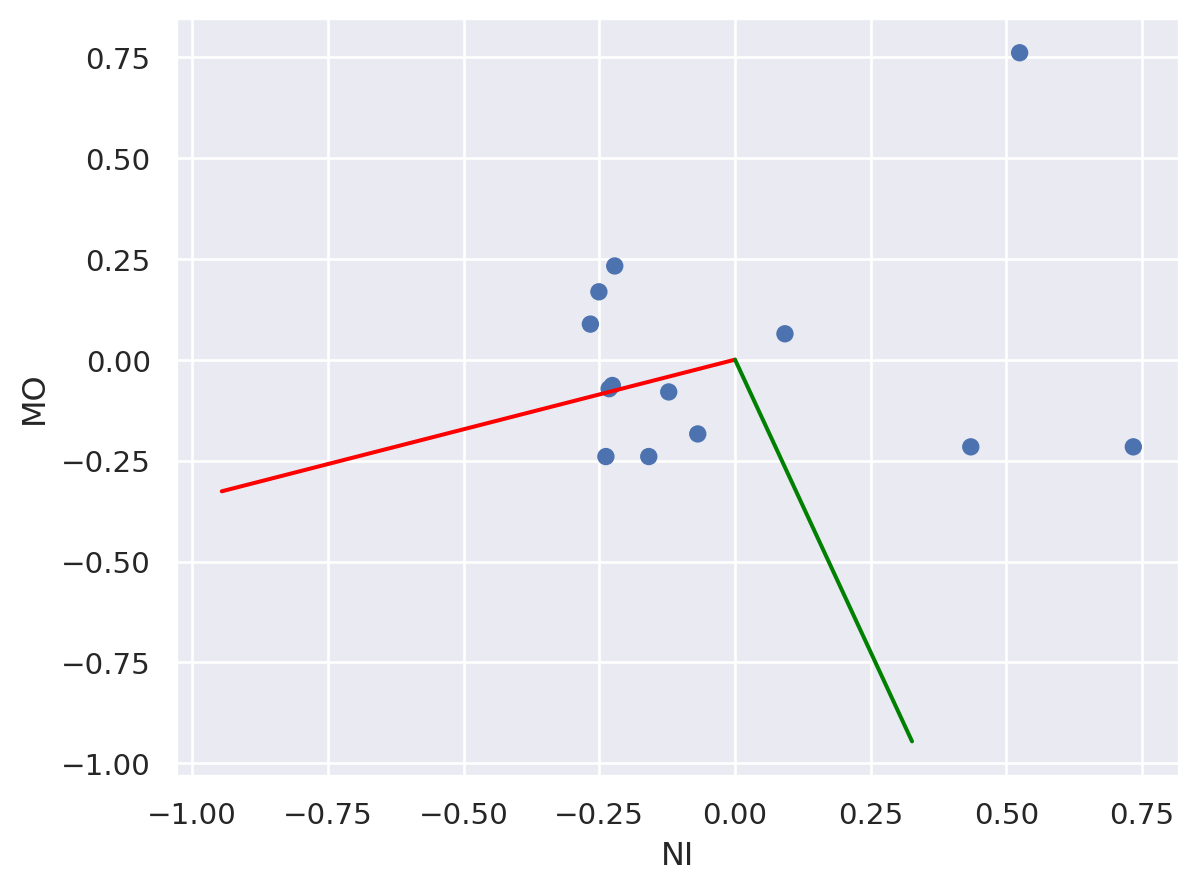

In [32]:
(
    so.Plot()
    .add(so.Dot(), x = X6_star["NI"], y = X6_star["MO"])
    .add(so.Line(color = "red"), x = [0, U[0,0]], y = [0, U[1,0]])
    .add(so.Line(color = "green"), x = [0, U[0,1]], y = [0, U[1,1]])
)

In [33]:
Z = X6_star @ U
Z.columns = ["Z1","Z2"]
Z

,Z1,Z2
0,-0.107812,-0.030517
1,-0.623076,0.443374
2,0.223165,-0.170053
3,0.234560,-0.013197
4,0.133790,-0.291552
5,-0.743367,-0.547554
6,0.182264,-0.240570
7,0.242649,-0.007524
8,0.228404,0.175099
9,-0.340098,0.345779


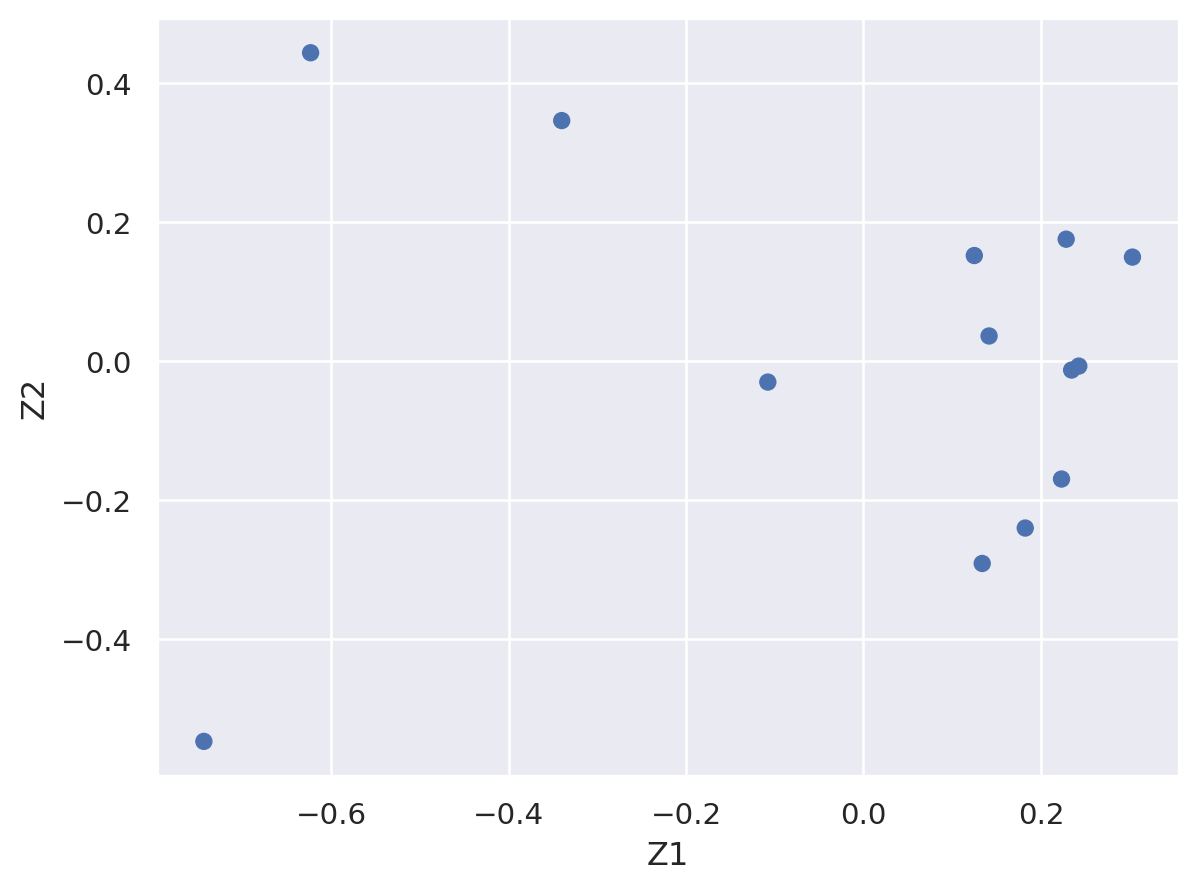

In [34]:
(
    so.Plot(Z, x = "Z1", y = "Z2")
    .add(so.Dot())
)

###b)

In [35]:
print("Variaza explicada por la primera componente: ", gamma[0] / sum(gamma))
print("Variaza explicada por la segunda componente: ", gamma[1] / sum(gamma))

Variaza explicada por la primera componente:  0.3719333549273244
Variaza explicada por la segunda componente:  0.6280666450726756


###e)

In [36]:
X6 = pd.read_csv("/content/p8-hospitales.csv")
X6

,Servicio,NI,MO,RE,NE,ICM,ES
0,Cirugia,2158,3.8,3.4,8567,1.17,21879
1,Tocoginecologia,5146,0.3,3.1,3782,0.52,22068
2,Hematologia,489,4.1,6.8,11005,1.68,4980
3,Cardiologia,677,2.2,3.9,2161,1.30,8587
4,Digestivo,698,5.9,3.2,9473,1.06,7189
5,Medicina.Interna,4171,12.5,5.5,21563,1.04,47909
6,Neumologia,562,5.1,4.4,2659,1.47,5098
7,Otorrinolaringologia,650,2.1,2.3,22024,0.87,3161
8,Oftalmologia,990,0.0,0.2,21752,0.82,1096
9,Pediatria,3752,0.3,2.1,8273,0.51,12152


In [37]:
X_6 = X6[["NI","MO"]]
X6_star = X_6 - X_6.mean()
n = len(X6_star)
Sigma = (X6_star.transpose() @ X6_star) / n
gamma, U = np.linalg.eigh(Sigma)
U = np.flip(U, 1)
print(gamma)
print(U)

[1.08819729e+01 2.33424389e+06]
[[-9.99999938e-01  3.52677226e-04]
 [-3.52677226e-04 -9.99999938e-01]]


In [38]:
Z = X6_star @ U
Z.columns = ["Z1","Z2"]
Z

,Z1,Z2
0,-428.307948,-0.648946
1,-3416.306528,3.904854
2,1240.691843,-1.537564
3,1052.692524,0.428739
4,1031.691221,-3.263854
5,-2441.310891,-8.639006
6,1167.691494,-2.511818
7,1079.692558,0.519217
8,739.693320,2.739127
9,-2022.306614,3.413222


In [39]:
print("Variaza explicada por la primera componente: ", gamma[0] / sum(gamma))
print("Variaza explicada por la segunda componente: ", gamma[1] / sum(gamma))

Variaza explicada por la primera componente:  4.6618617087873635e-06
Variaza explicada por la segunda componente:  0.9999953381382912


##7)

In [40]:
X7 = pd.read_csv("/content/p8-calidad-agua.csv")
X7

,x1,x2,x3,x4
0,0.01411,0.12445,1.04539,0.04318
1,-0.17200,1.01532,0.05276,-0.18680
2,1.03277,-0.00024,0.03330,-0.02765
3,0.06603,0.77159,-0.26459,0.05418
4,0.98548,0.06333,-0.03382,-0.09569
...,...,...,...,...
360,-0.09208,0.84087,-0.10243,-0.11231
361,-0.32223,-0.24897,1.13032,0.15636
362,1.15268,-0.17168,0.11728,-0.02610
363,0.94714,0.04118,-0.20791,-0.26628


###a)

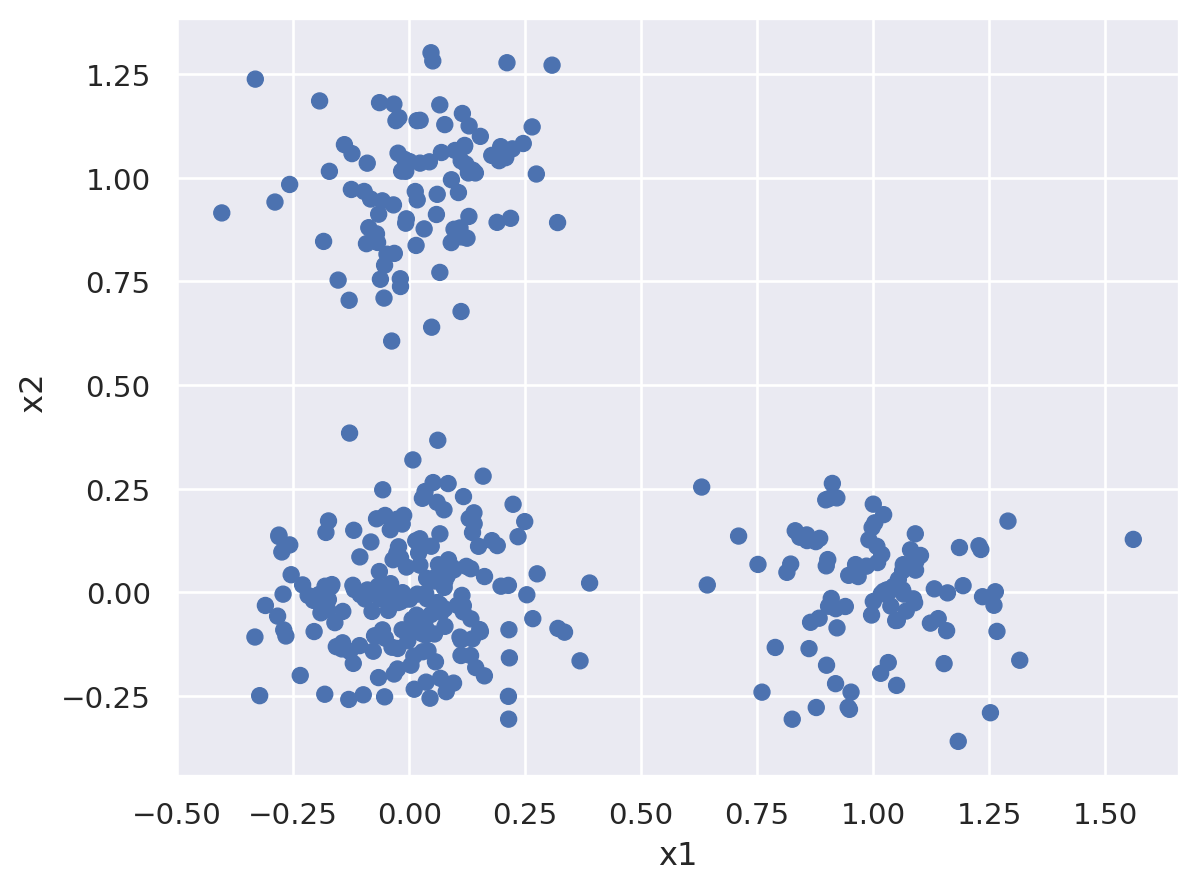

In [41]:
(
    so.Plot(X7, x = "x1", y = " x2")
    .add(so.Dot())
)

Se pueden observar 3 clusters

###b)

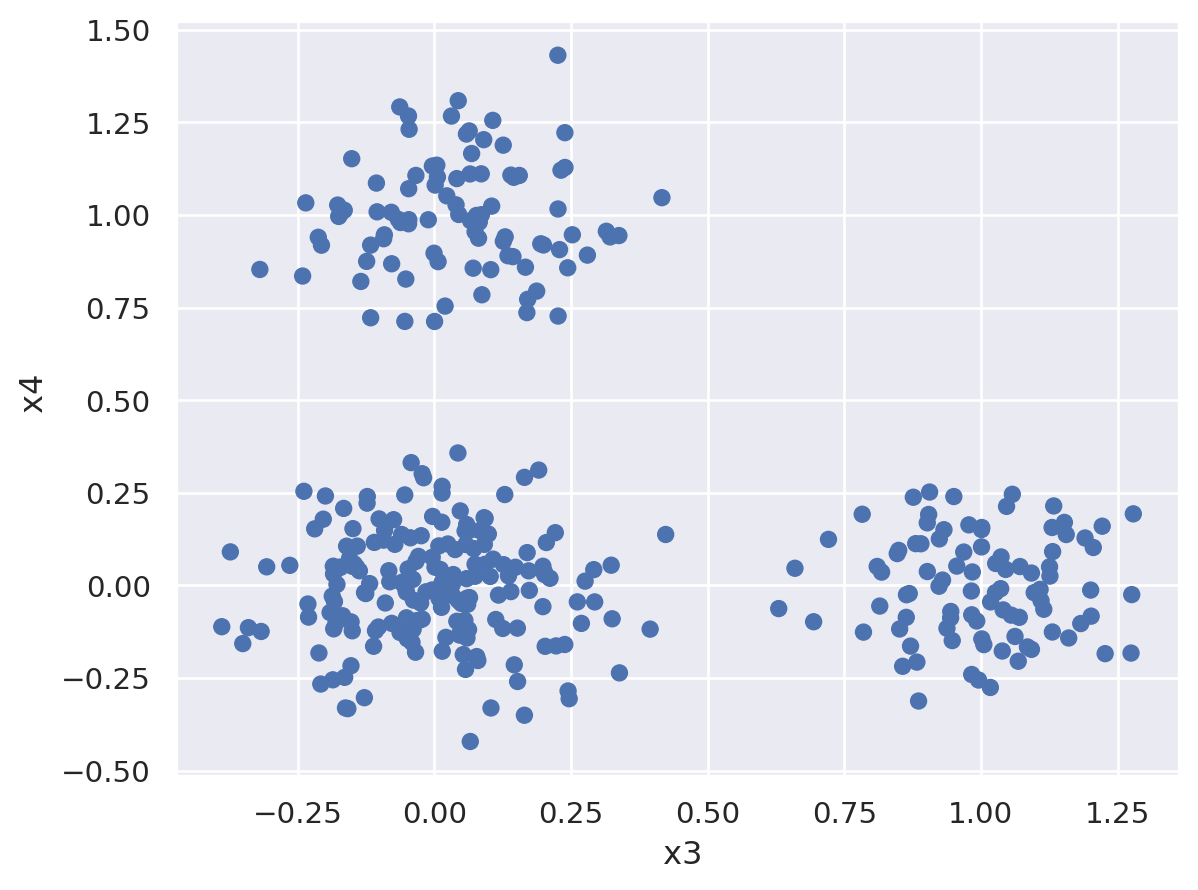

In [42]:
(
    so.Plot(X7, x = " x3", y = " x4")
    .add(so.Dot())
)

Aca tambien se pueden observar 3 clusters

###c)

In [43]:
X7_star = X7 - X7.mean()
n = len(X7_star)
Sigma = (X7_star.transpose() @ X7_star) / n
print(Sigma)
print(n)

           x1        x2        x3        x4
x1   0.209560 -0.054550 -0.072641 -0.060901
 x2 -0.054550  0.200312 -0.063065 -0.061528
 x3 -0.072641 -0.063065  0.204462 -0.053248
 x4 -0.060901 -0.061528 -0.053248  0.208938
365


In [44]:
gamma, U = np.linalg.eigh(Sigma)
U = np.flip(U, 1)
print(gamma)
print(U)

[0.02267556 0.25439009 0.26261561 0.28359054]
[[ 0.67394723 -0.24936321 -0.48030696 -0.50290988]
 [ 0.26395701  0.55203834  0.61041004 -0.50297113]
 [-0.60131006  0.3617251  -0.49183232 -0.51544363]
 [-0.33844947 -0.70867949  0.39345365 -0.47793259]]


In [45]:
Z = X7_star @ U
Z.columns = ["Z1","Z2","Z3","Z4"]
Z

,Z1,Z2,Z3,Z4
0,-0.600860,0.426496,-0.419753,-0.127337
1,0.183578,0.768623,0.611154,0.139737
2,0.685302,-0.212256,-0.515224,-0.021388
3,0.388929,0.289147,0.598949,0.191023
4,0.733599,-0.141431,-0.447466,0.037536
...,...,...,...,...
360,0.259498,0.543465,0.571918,0.231679
361,-1.015478,0.254738,-0.483386,0.131762
362,0.669840,-0.307520,-0.718161,-0.039491
363,0.864331,-0.086177,-0.424067,0.239222


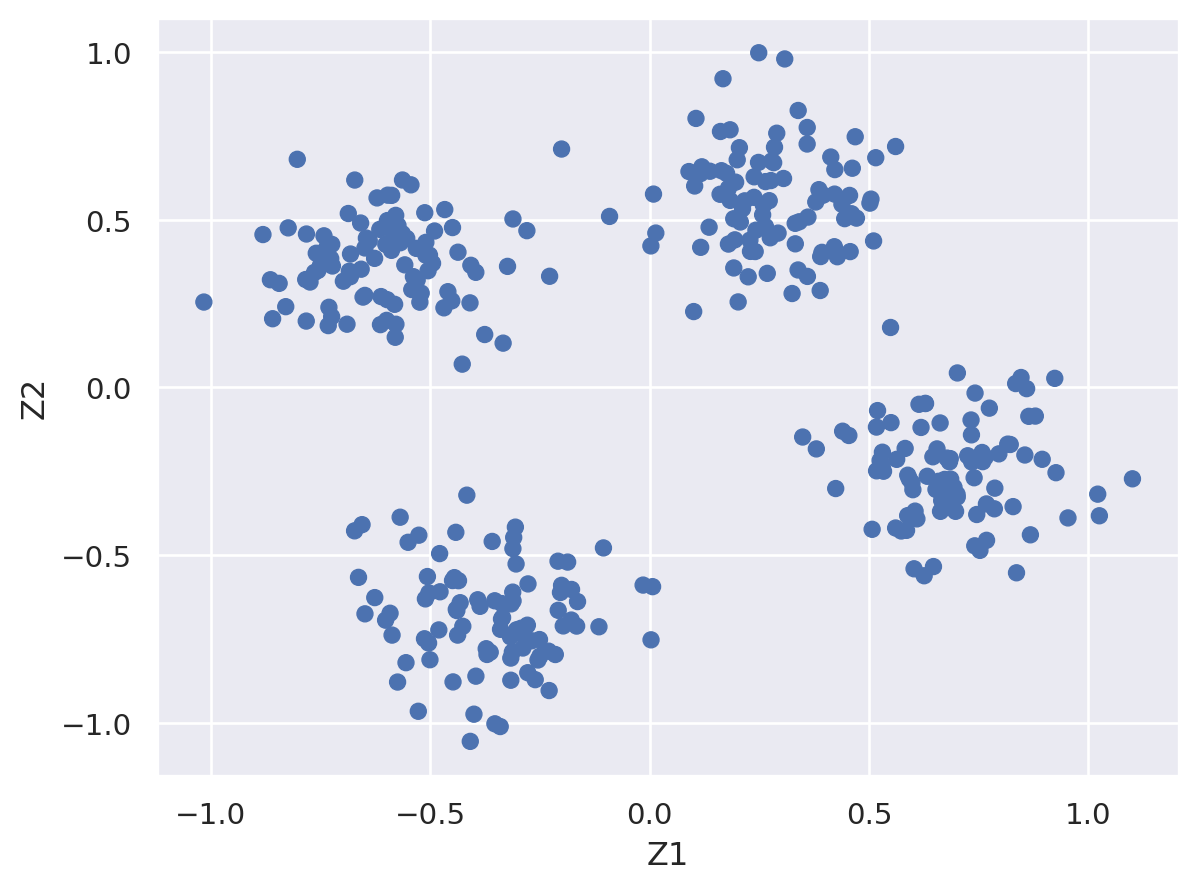

In [46]:
(
    so.Plot(Z, x = "Z1", y = "Z2")
    .add(so.Dot())
)

###d)

Utilizo DBSCAN

In [47]:
from sklearn.cluster import DBSCAN
W = Z[["Z1","Z2"]]
W

,Z1,Z2
0,-0.600860,0.426496
1,0.183578,0.768623
2,0.685302,-0.212256
3,0.388929,0.289147
4,0.733599,-0.141431
...,...,...
360,0.259498,0.543465
361,-1.015478,0.254738
362,0.669840,-0.307520
363,0.864331,-0.086177


In [48]:
clustering = DBSCAN(eps=0.2, min_samples=10) #La distancia que vemos entre clusters.
etiqueta = clustering.fit_predict(W) #¿cuántos puntos tienen a distancia menor que eps los puntos del cluster?
print(etiqueta)

[ 0  1  2  1  2  1  0  2  0  1  3  0  3  0  1  1  3  1  1  1  3  2  1  1
  2  1  0  0  1  2  0  0  2  1  0  3  2  0  1  2  1  3  1  1  1  1  0  2
  1  3  2  1  2  0  0  1  1  2  0  3  0  0  1  3  3  3  3  1  0  0  1  2
  3  1  3  2  1  3  3  2  0  3  2  1  3  2  3  3  3  1  1  1  2  0  1  0
  0  0  2  2  3  3  0  1  2  0  2  3  0  2  2  2  3  2  0  2  2  1  2  3
  1  0  3  0  0  0  2  3  0  2  3  0  3  3  0  2  2  3  3  2  2  0  2  1
  0  1  2  1  3  3  0  3  2  0  1  3  3  3  2  1  0  2  2  1  1  0  3  0
  3  1  3  1  3  0  0  0  1  0  0  0  0  3  2  0  1  2  2  1  1  3  1  2
  0  0  3  0  3  3  0  2  2  2  2  2  3  0  1  1  3  1  2  3  0  1  1  1
  0  2  2  3  2  0  3  1  2  1  1  1  1  2  3  3  0  2  0  0  2  3  0  1
  0  2  1  3  3  0  0  0  0  1  1  0  1  3  3  3  2  1  2  1  0  1  0  3
  3  2  3  2  0  3  2  3  2  1  2  3  2  2  2  0  1  1  1  3  3  0  3  1
  0  3  3  3  2  3  0  0  3  1  3  2  1  0  2  1  3  3  2  2  2  0  0  2
  0  3  1  0  3  3  2  3  1  3  2  0  0  3  1  0  3

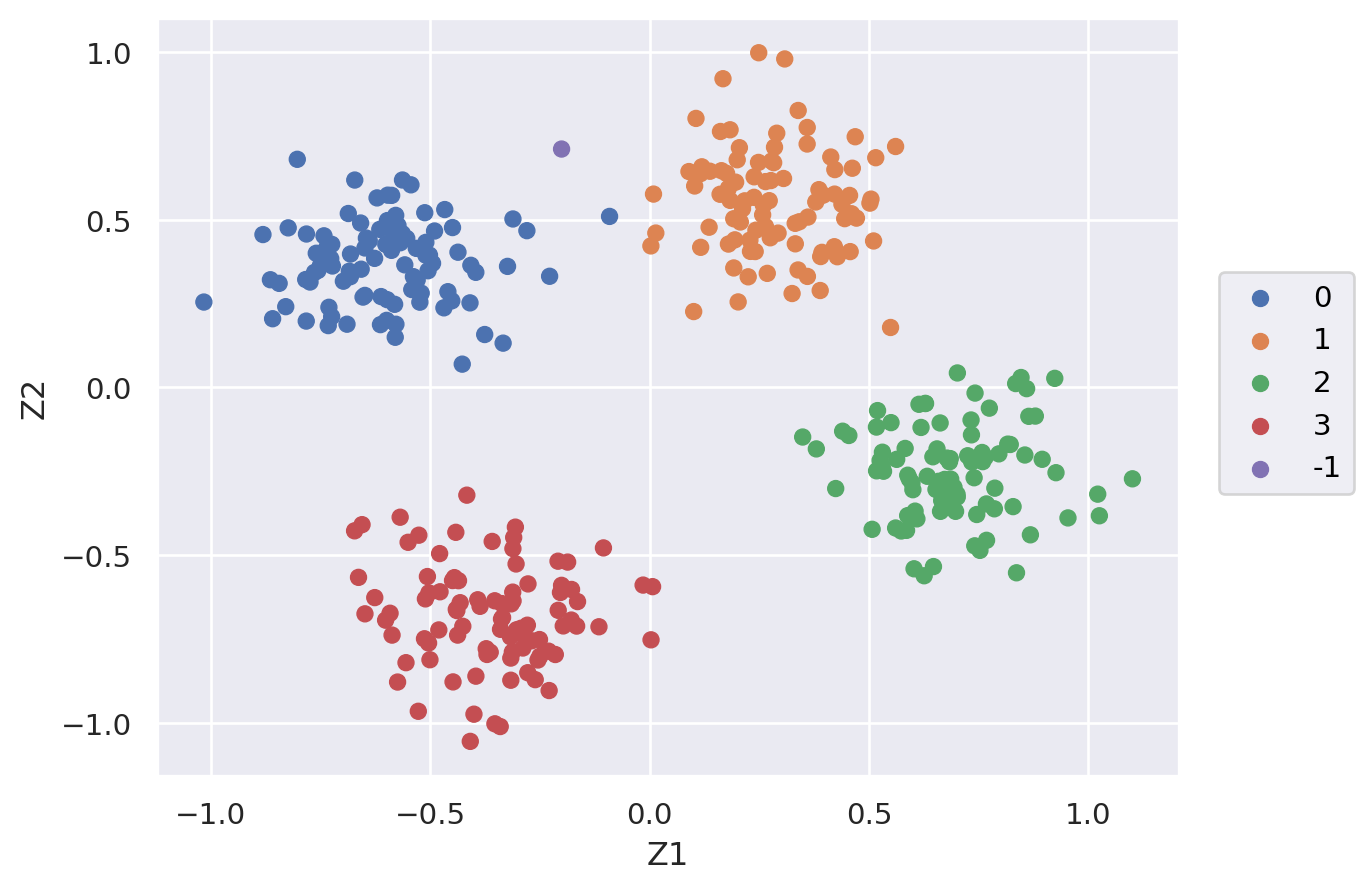

In [49]:
(
    so.Plot(W, x = "Z1", y = "Z2", color = etiqueta.astype("str"))
    .add(so.Dot())
)